# <AARRR 분석>

## 문제 1: 데이터 로드 및 탐색
- 1) 데이터의 첫 5개 행을 출력하여 데이터 형식 확인하기
- 2) 데이터프레임의 컬럼 정보 & 결측치 여부를 확인하고 전처리를 어떻게 할지 고민하기!

In [ ]:
# 데이터 불러오기
import pandas as pd

file_path = '/content/online_retail_II.xlsx'

# online_retail_||.xlsx 데이터가 2개의 시트로 이루어진 데이터 이므로 시트들을 합치기
df1 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
df2 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

# 2. 두 데이터프레임을 위로 이어붙이기
df = pd.concat([df1, df2], ignore_index=True)

print(df.shape)

(1067371, 8)


In [ ]:
# 1) 데이터의 첫 5개 행을 출력하여 데이터 형식 확인하기
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 문제 2: 데이터 전처리
- 1) InvoiceDate 컬럼을 날짜 형식으로 변환하고, Customer ID에 결측치가 있는 행을 제거하기
- 2) Customer ID를 정수형으로 변환한 후, InvoiceDate를 기준으로 데이터 정렬하기
- 3) 금액을 나타내는 새로운 Total 컬럼 생성하기 (Total = Quantity * Price)

In [ ]:
# 1) InvoiceDate 컬럼을 날짜 형식으로 변환하고, Customer ID에 결측치가 있는 행을 제거하기
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.dropna(subset = ['Customer ID'])

In [ ]:
# 2) Customer ID를 정수형으로 변환한 후, InvoiceDate를 기준으로 데이터 정렬하기
df['Customer ID'] = df['Customer ID'].astype(int)
df = df.sort_values(by='InvoiceDate')

In [ ]:
# 3) 금액을 나타내는 새로운 Total 컬럼 생성하기 (Total = Quantity * Price)
df['Total'] = df['Quantity'] * df['Price']

In [ ]:
print(df.shape)
df.head() # 확인하기

(824364, 9)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
 8   Total        824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 62.9+ MB


## 문제 3: 나라별 구매 인원 시각화하기
- Country 컬럼을 기준으로 Customer ID의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 하기

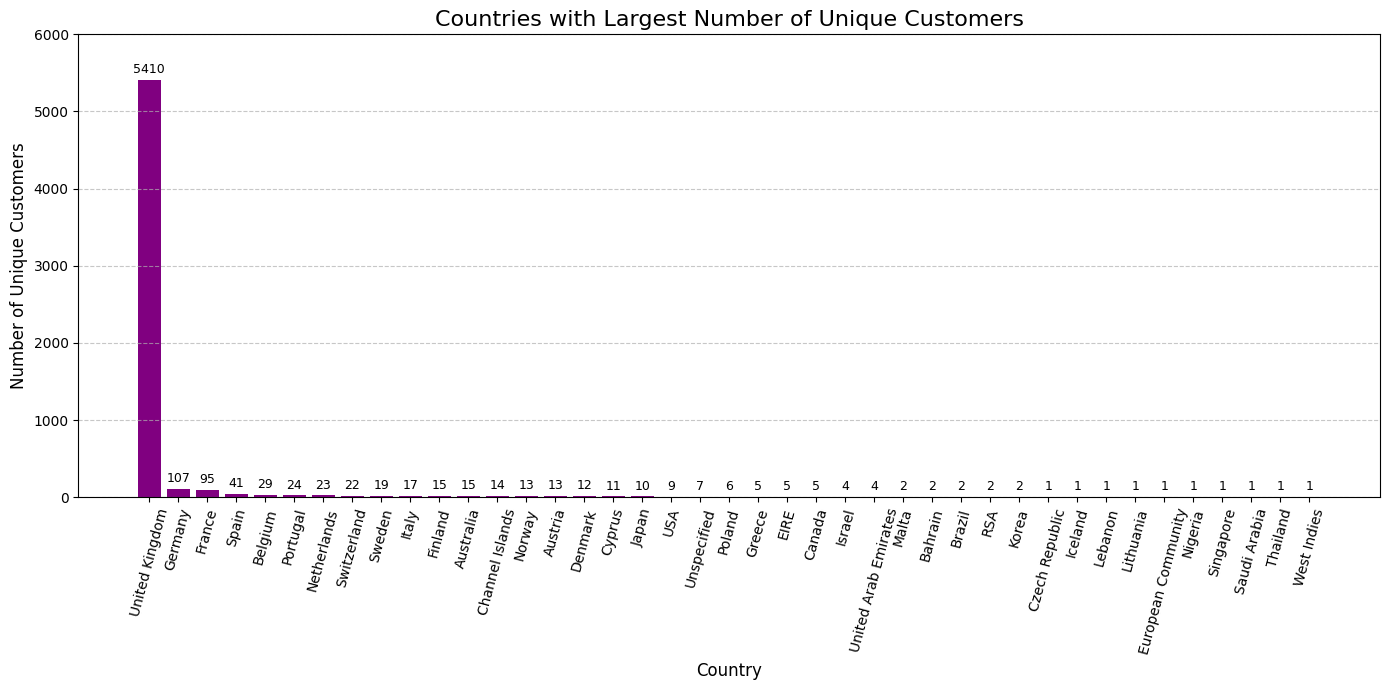

In [ ]:
import matplotlib.pyplot as plt

country_customer = df.groupby('Country')['Customer ID'].nunique()
country_customer = country_customer.sort_values(ascending=False)

# 시각화 하기
plt.figure(figsize=(14, 7))
bars = plt.bar(country_customer.index, country_customer.values, color='purple')

plt.title('Countries with Largest Number of Unique Customers', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Unique Customers', fontsize=12)
plt.xticks(rotation=75)

# y축 단위 1000 간격으로 설정하기
plt.yticks(range(0, int(country_customer.max()) + 1000, 1000))

# 각 bar 위에 수치 표시하기
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # bar의 중심 x좌표
        height + 50,                       # bar보다 약간 위쪽(y좌표)
        f'{int(height)}',                  # 표시할 텍스트 (정수형 변환)
        ha='center', va='bottom', fontsize=9
    )

# y축에 grid 추가하기
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 레이아웃 자동 조정하기
plt.tight_layout()

# 그래프 출력
plt.show()

## 문제 4: Acquisition (고객 유입 분석)
- 1) 신규 고객 분석을 위해서 고객의 첫 구매 시점을 기준으로, 월별 신규 유입 고객 수를 계산하기
- 2) 각 고객의 첫 구매 날짜를 추출하고, 월별 신규 고객 수를 시각화 하기

In [ ]:
# 1) Customer ID별로 첫 구매 날짜 찾기
first_purchase = df.groupby('Customer ID')['InvoiceDate'].min() # 첫 구매 날짜이므로, min을 사용

In [ ]:
first_purchase_month = first_purchase.dt.to_period('M').astype(str) # 첫 구매 날짜를 연-월 형태로 변환 (시간 필요 없으므로)

first_purchase_month.head()

,InvoiceDate
Customer ID,
12346,2009-12
12347,2010-10
12348,2010-09
12349,2009-12
12350,2011-02


In [ ]:
new_customer_per_month = first_purchase_month.value_counts().sort_index() # 월별 신규 고객수 계산

new_customer_per_month.head()

,count
InvoiceDate,
2009-12,1045
2010-01,394
2010-02,363
2010-03,436
2010-04,291


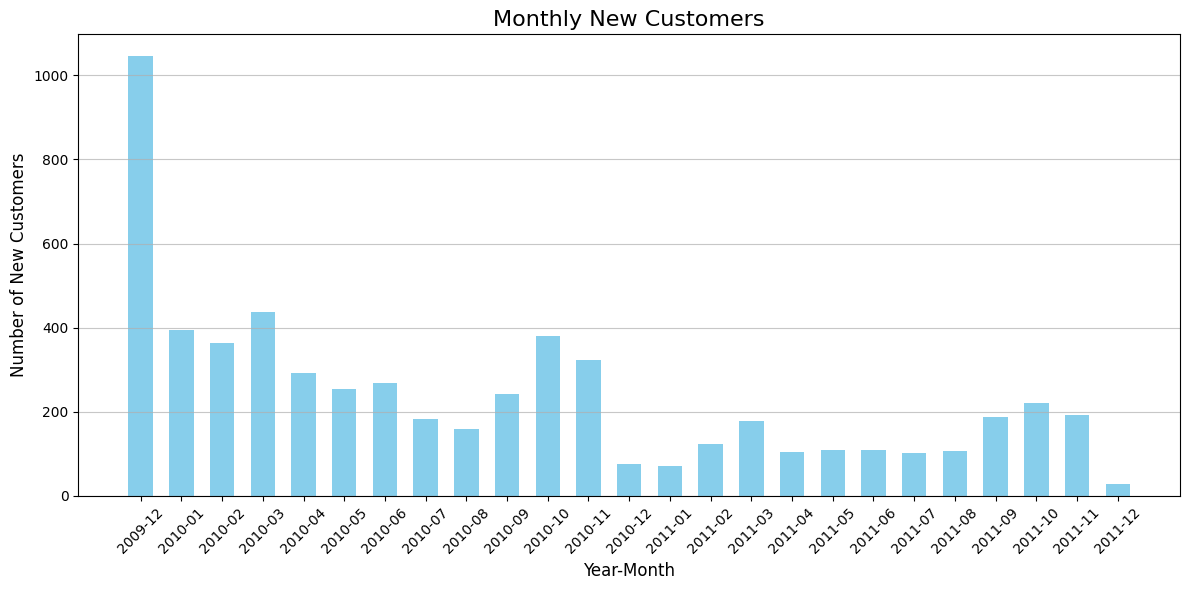

In [ ]:
# 2) 월별 신규 고객 수를 시각화 하기
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(new_customer_per_month.index, new_customer_per_month.values, width=0.6, color='skyblue')

plt.title('Monthly New Customers', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of New Customers', fontsize=12)
plt.xticks(rotation=45)

# y축에 grid 추가하기
plt.grid(axis='y', linestyle='-', alpha=0.7)

# 레이아웃 조정하기
plt.tight_layout()

# 그래프 출력
plt.show()

## 문제 5: Activation (고객 활성화 분석)
- 1) 모든 고객 중 첫 구매 이후 총 구매 금액이 특정 기준 금액 (50유로) 이상인 고객을 활성화된 고객으로 정의합니다.
- 2) 전체 고객 수와 활성화된 고객 수를 비교하여 활성화율을 도출하기

In [ ]:
# 1) 모든 고객 중 첫 구매 이후 총 구매 금액이 특정 기준 금액 (50유로) 이상인 고객을 활성화된 고객으로 정의합니다.
customer_total_purchase = df.groupby('Customer ID')['Total'].sum()
activ_customers = customer_total_purchase[customer_total_purchase >= 50] # 활성화된 고객 판별하기

In [ ]:
# 2) 전체 고객 수와 활성화된 고객 수를 비교하여 활성화율을 도출하기
total_customers = customer_total_purchase.shape[0]
activ_customers_cnt = activ_customers.shape[0]

activation_rate = activ_customers_cnt / total_customers * 100 # 활성화율 계산하기

In [ ]:
print(f"총 고객 수: {total_customers}명")
print(f"활성화된 고객 수: {activ_customers_cnt}명")
print(f"고객 활성화율: {activation_rate:.2f}%")

총 고객 수: 5942명
활성화된 고객 수: 5777명
고객 활성화율: 97.22%


## 문제 6: Retention: 코호트 분석 (고객)
- 1) 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하기
- 2) 분기별 활성 고객수를 계산하고, 이를 시각화하여 고객 유지 트렌드를 분석하기

In [ ]:
# 1) 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하기

# InvoiceDate를 분기 기준으로 변환하기
df['Quarter'] = df['InvoiceDate'].dt.to_period('Q')

# 고객별 최초 구매 분기(cohort_quarter) 계산하기
df['cohort_quarter'] = df.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('Q')

# 주문 발생 분기(order_quarter) 계산하기
df['order_quarter'] = df['InvoiceDate'].dt.to_period('Q')

# Cohort Index 계산하기 (몇 번째 분기인지)
df['cohort_index'] = (df['order_quarter'] - df['cohort_quarter']).apply(lambda x: x.n)

In [ ]:
# 2) 분기별 활성 고객수를 계산하고, 이를 시각화하여 고객 유지 트렌드를 분석하기

# cohort_quarter별, 경과 분기(cohort_index)별 활성 고객 수 구하기
cohort_counts = df.groupby(['cohort_quarter', 'cohort_index'])['Customer ID'].nunique().unstack()

# Retention Rate 테이블 만들기
retention = cohort_counts.divide(cohort_counts.iloc[:,0], axis=0) * 100

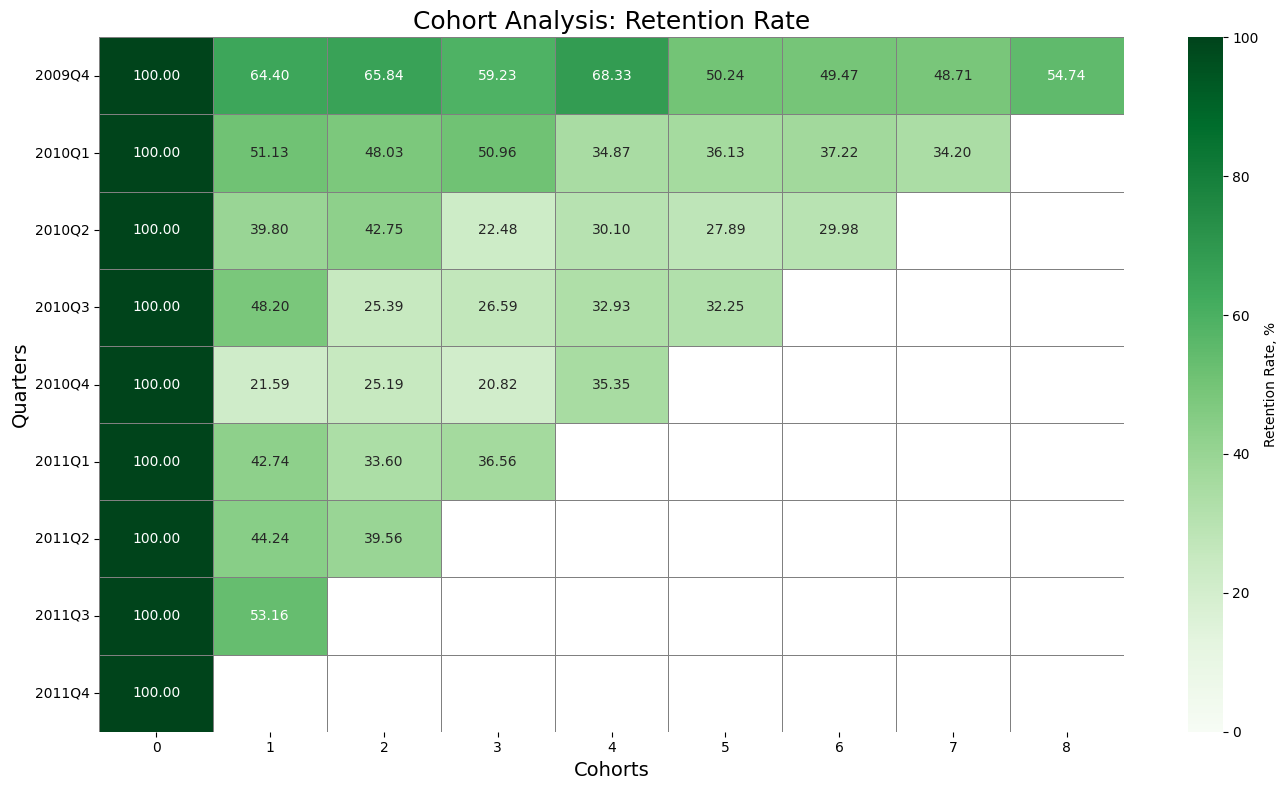

In [ ]:
# 시각화 하기 (히트맵)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(
    data=retention,
    annot=True,
    fmt='.2f',
    cmap='Greens',
    cbar_kws={'label': 'Retention Rate, %'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0,
    vmax=100
)

plt.title('Cohort Analysis: Retention Rate', fontsize=18)
plt.xlabel('Cohorts', fontsize=14)
plt.ylabel('Quarters', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 문제 7: Retention: 코호트 분석 (평균 구매수량)
- 분기단위의 활성 사용자의 평균 구매수량을 분석하세요
  - 구매수량이기 때문에 0 index의 값이 100%가 아닌 절대 값임을 주의하기

In [ ]:
# InvoicDate를 분기로 변환
df['Quarter'] = df['InvoiceDate'].dt.to_period('Q')

# 고객 최초 구매 분기
df['cohort_quarter'] = df.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('Q')

# 주문 발생 분기
df['order_quarter'] = df['InvoiceDate'].dt.to_period('Q')

# 가입 후 경과 분기
df['cohort_index'] = (df['order_quarter'] - df['cohort_quarter']).apply(lambda x: x.n)

In [ ]:
# cohort_quarter, cohort_index 별 평균 구매수량
average_quantity = df.groupby(['cohort_quarter', 'cohort_index'])['Quantity'].mean().unstack()

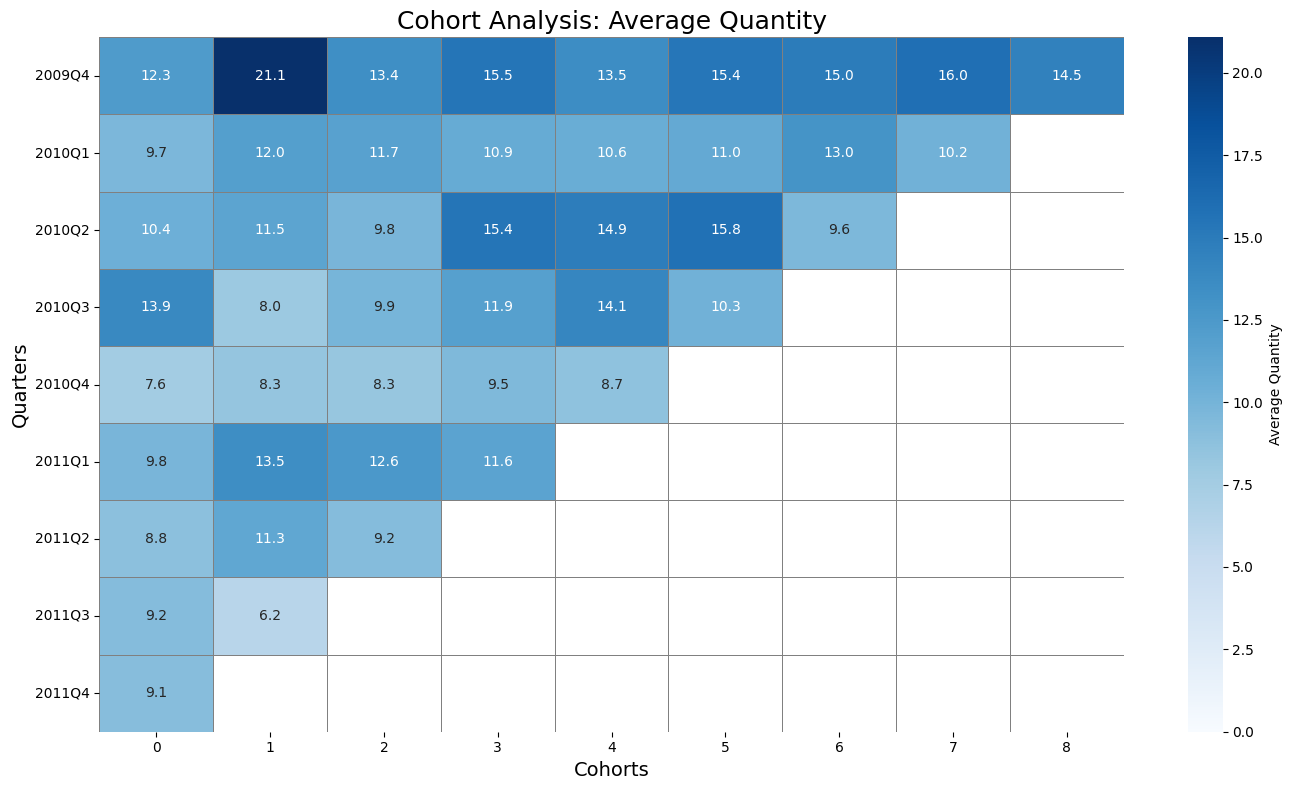

In [ ]:
# 시각화 하기 (히트맵)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(
    data=average_quantity,
    annot=True,                # 셀 내부에 값 표시
    fmt='.1f',                 # 소수점 1자리
    cmap='Blues',              # 색상 팔레트
    cbar_kws={'label': 'Average Quantity'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',           # 셀 경계 색상
    vmin=0                     # 최소값은 0
)
plt.title('Cohort Analysis: Average Quantity', fontsize=18)
plt.xlabel('Cohorts', fontsize=14)
plt.ylabel('Quarters', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 문제 8: Revenue: ARPU
- 각 고객의 월별 구매 금액을 집계하고, 이를 기반으로 ARPU를 분석하세요

In [ ]:
# InvoiceDate를 연-월 형태로 변환
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# 월별 ARPU 계산하기
monthly_revenue = df.groupby('YearMonth')['Total'].sum()
monthly_active_users = df.groupby('YearMonth')['Customer ID'].nunique()

ARPU = monthly_revenue / monthly_active_users

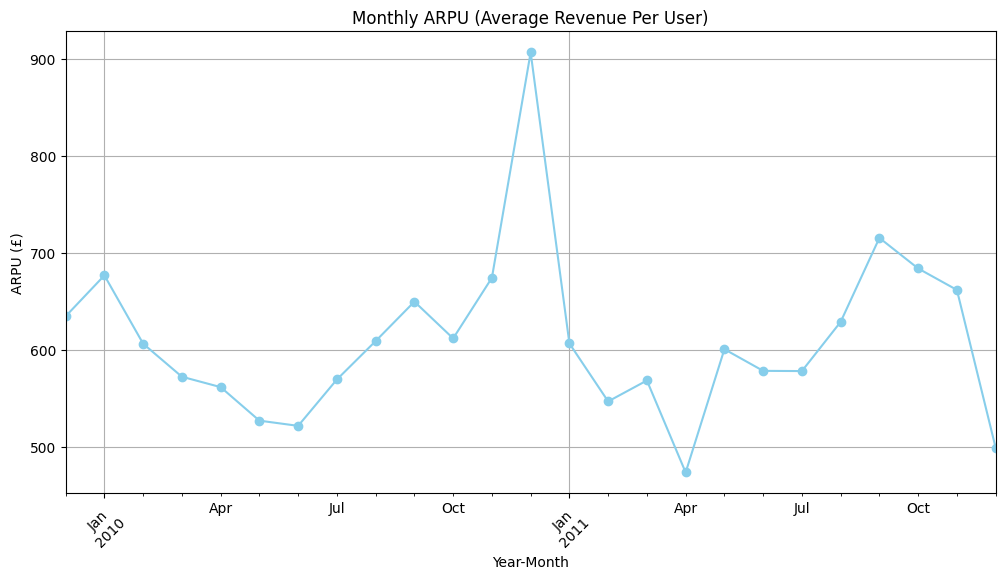

In [ ]:
# 시각화 하기
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ARPU.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 문제 9: Revenue (CLV)
- 고객 생애 가치를 예측하기 위해 CLV를 계산하고 표로 CLV 기준으로 내림차순으로 정렬하기
- CLV 식: 평균 금액 * 평균 구매 빈도 * 고객 유지 기간 (단, Invoice Date의 최대 - 최소 + 1 해주기)

In [ ]:
# 고객별 총 구매금액, 구매횟수, 첫 구매일, 마지막 구매일 계산
customer_clv = df.groupby('Customer ID').agg(
    Total_Revenue=('Total', 'sum'),
    Frequency=('InvoiceDate', 'nunique'),
    First_Purchase=('InvoiceDate', 'min'),
    Last_Purchase=('InvoiceDate', 'max')
)

# 고객 유지 기간 (최대 - 최소 + 1)
customer_clv['Customer_Lifespan (days)'] = (customer_clv['Last_Purchase'] - customer_clv['First_Purchase']).dt.days + 1

# 평균 구매 금액
customer_clv['Avg_Purchase_Value'] = customer_clv['Total_Revenue'] / customer_clv['Frequency']

# 평균 구매 빈도
customer_clv['Avg_Purchase_Frequency'] = customer_clv['Frequency'] / customer_clv['Customer_Lifespan (days)']

# CLV 계산 (평균 금액 * 평균 구매 빈도 * 고객 유지 기간)
customer_clv['CLV'] = customer_clv['Avg_Purchase_Value'] * customer_clv['Avg_Purchase_Frequency'] * customer_clv['Customer_Lifespan (days)']

customer_clv = customer_clv.reset_index() # Customer ID를 컬럼으로 리셋
customer_clv = customer_clv[['Customer ID', 'CLV', 'Total_Revenue', 'Frequency', 'Customer_Lifespan (days)']] # 필요한 컬럼들만 정리
customer_clv = customer_clv.sort_values('CLV', ascending=False) # CLV 기준으로 내림차순 정렬


customer_clv.head(10)

,Customer ID,CLV,Total_Revenue,Frequency,Customer_Lifespan (days)
5756,18102,598215.22,598215.22,145,739
2300,14646,523342.07,523342.07,164,736
1810,14156,296564.69,296564.69,201,729
2565,14911,270248.53,270248.53,508,738
5104,17450,233579.39,233579.39,61,430
1348,13694,190825.52,190825.52,164,732
5165,17511,171885.98,171885.98,86,735
69,12415,143269.29,143269.29,32,504
4338,16684,141502.25,141502.25,64,729
2715,15061,136391.48,136391.48,133,735


# <기초통계 문제>

## 문제 10
- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다. 고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [ ]:
# 균등분포에 대한 문제

import numpy as np

# 균등분포 시뮬레이션
from scipy.stats import uniform

user_count = 100
waiting_times = uniform.rvs(loc=5, scale=10, size=user_count, random_state=0)

# 평균과 표준편차 계산
mean_waiting_time = np.mean(waiting_times)
std_waiting_time = np.std(waiting_times, ddof=1)

print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

평균 대기시간: 9.73
표준편차: 2.90


## 문제 11
- 한 신제품의 초기 성공 확률이 0.3 이라고 가정합니다. 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [ ]:
# 베르누이 분포에 대한 문제

from scipy.stats import bernoulli

# 성공 확률과 시행 횟수 정의
p = 0.3
n = 10

# 베르누이 분포 시뮬레이션
outcomes = bernoulli.rvs(p, size=n)
success_count = outcomes.sum()

print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

각 시도 결과: [0 0 0 1 0 0 0 0 0 0]
성공 횟수: 1


## 문제 12
- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다. 각 문제의 정답 확률은 0.7이라고 가정할때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

In [ ]:
# 이항분포에 대한 문제

from scipy.stats import binom

# 문제 수, 정답 확률, 학생 수
num_of_stds = 20
num_of_quizzes = 5
percent = 0.7

# 각 학생의 점수 시뮬레이션
scores = binom.rvs(num_of_quizzes, p=percent, size=num_of_stds, random_state=0)
average_score = np.mean(scores)

print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")

학생별 점수: [3 3 3 3 4 3 4 2 2 4 3 3 3 2 5 5 5 3 3 2]
평균 점수: 3.25


## 문제 13
- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다. 1000개의 제품 무게를 시뮬레이션 하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산 (변수명:withib_range) 하세요. 무게 분포의 히스토그램을 그리세요.

In [ ]:
# 정규분포에 대한 문제

import matplotlib.pyplot as plt
from scipy.stats import norm

# 평균, 표준편차, 샘플 수
mu = 50
sigma = 5
num_of_samples = 1000

# 정규분포 시뮬레이션
weights = norm.rvs(loc=mu, scale=sigma, size=num_of_samples, random_state=0)

# 45g 이상 55g 이하의 '비율' 계산
conds = (weights >= 45) & (weights <= 55)
within_range = len(weights[conds]) / len(weights)
print(f'45g 이상 55g 이하의 비율 계산: {within_range:.2f}')

45g 이상 55g 이하의 비율 계산: 0.70


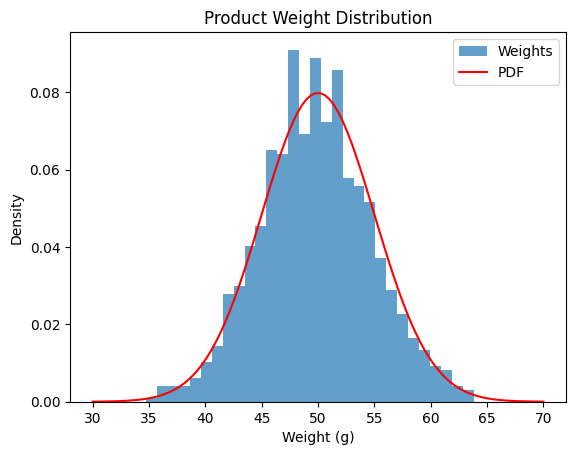

45g 이상 55g 이하 비율: 69.90%


In [ ]:
# 무게 분포의 히스토그램 그리기
plt.hist(weights, bins=30, density=True, alpha=0.7, label='Weights')
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt. plot(x, norm.pdf(x, mu, sigma), 'r-', label='PDF')

plt.xlabel('Weight (g)')
plt.ylabel('Density')
plt.title('Product Weight Distribution')
plt.legend()
plt.show()

print(f"45g 이상 55g 이하 비율: {within_range:.2%}")

## <회고>

- 잘한 점
  - AARRR 분석에서, 문제에서 주어진 대로 데이터 전처리를 잘 진행하였다.
  - 각 분석 단계마다 필요한 정보들을 잘 구하였다.
  - 통계 문제에서는, 문제를 보고 어떤 분포에 대한 문제인지 잘 파악하였다.

- 아쉬운 점
  - barplot, histogram, heatmap 등 시각화 하는 코드에서 디테일한 부분은 익숙하지 않으므로 LLM의 도움을 받아야 한다.
  - Retention 분석이나 CLV 등은 머리로는 이해가 가지만, 직접 구현할때는 아직도 어렵다 ㅠㅠ